In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from simworlds.gambler_world import GamblerWorld
from rl.actor import Actor
from rl.critic import Critic
import numpy as np
import seaborn as sns

In [28]:
table = False

In [29]:
a = Actor(alpha=0.05, gamma=0.9, lambda_lr=0.9, epsilon=0.5)
c = Critic(isTable=table, alpha=0.05, gamma=0.9, lambda_lr=0.9, inputNeurons=101)

In [30]:
episodes = range(200)
steps = range(100)

for episode in episodes:
    print("Episode", episode) 
    world = GamblerWorld()
    state_0 = world.state
    
    c.reset_episode(state_0)
    a.reset_episode()

    state = state_0
    legal_actions = world.get_legal_actions()
    action = a.select_action(state, legal_actions)

    flag = False
    while not flag:
        new_state, reward = world.do_action(action)  # Step 1
        legal_actions = world.get_legal_actions()
        
        if new_state.is_final_state:
            flag = True
        else:        
            new_action = a.select_action(new_state, legal_actions)  # Step 2


        a.update_eligibility(state, action)  # Step 3


        td = c.calculate_td(state, new_state, reward)  # step 4,5
        
        
        # step 6
        c.update(td, state=state, new_state=new_state)
        a.update(td)

        # Step 7
        action = new_action
        state = new_state

    if not table:
        c.update_weights() 


Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7


C:\Users\joste\anaconda3\envs\tdt4195\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episode 89
Episode 90
Episode 91
Episode 92
Episode 93
Episode 94
Episode 95
Episode 96
Episode 97
Episode 98
E

<AxesSubplot:>

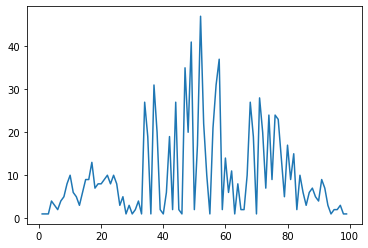

In [31]:
p = a.get_greedy_policy()
x = []
y = []
for state, action in p.items():
    x.append(state.units)
    y.append(action.units)

x = np.array(x)
y = np.array(y)
sns.lineplot(x=x, y=y)